# Projet Machine Learning
## Description travail rendu
Nous avons effectuez des prédictions sur les communes de france mais aussi les départements (qui sont composées des moyennes par communes du departement et de d'autres données trouvé sur internet qui n'était disponible que par département)
## Traitement et nettoyage des données
Dans le dossier data nous avons stocker tout les fichiers bruts que nous avons trouvés sur internet (les liens sont dans le fichier source.txt) et les fichiers avec seulement les informations qui nous semblent pertinentes. Le fichier principale que nous utilisont pour stocker les données est ***"all_informations.csv"***, toutes les informations sont des données de 2021 pour pouvoir tirer des conclusions les plus précises sur les votes de la présidentielle de 2022.<br/>
Les données que nous avons trouvées sur internet qui y sont stockées sont:
- Le code départemental
- Le nombres d'infractions qui vient du fichier *delinquance-commune.csv*
- Population
- Libellé
- Nombre de personnes agées de 65 ou plus
- Médiane du niveau de vie
- Taux de pauvreté
- Part des diplomés d'un BAC+5 ou plus
Nous y avons aussi insérer les données que nous voulions étudiez provenant du fichier des votes de la présidentielle du 1er et 2eme tour.
- Le taux d'abstention du 1er tour
- Le pourcentage de vote pour chaque candidat au 1er tour representée par la collone avec leurs *NOM Prenom*
- Le pourcentage de vote pour Emmanuel Macron au 2nd tour (Nous n'avons pas mis celui de Marine LE PEN car il est définit par 1-celui de Emmanuel MACRON)


In [70]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import statsmodels.api as sm


In [71]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso


In [72]:
df_all = pd.read_csv('data/all_informations.csv')
df_chomage = pd.read_csv('data/taux_de_chomage_annuel_moyen.csv')
df_adminpublique = pd.read_csv('data/part_des_poste_admin_publique_santé.csv',delimiter='\t')
df_territoire=pd.read_csv('data/territoire_ville.csv',delimiter='\t')

# Fusionner les fichiers en fonction des colonnes "code département" et "code"
df_chomage=df_chomage.drop('Libellé',axis=1)
df_territoire=df_territoire.drop('Libellé',axis=1)
df_adminpublique=df_adminpublique.drop('Libellé',axis=1)

print(df_territoire)

df_chomage['Taux de chômage annuel moyen des 50 ans ou plus 2022'] = pd.to_numeric(df_chomage['Taux de chômage annuel moyen des 50 ans ou plus 2022'], errors='coerce', downcast='float')

df_adminpublique["Part postes de l'admin. publique, enseignement, santé et action sociale dans les étab. actifs au 31/12 2021"]= pd.to_numeric(df_adminpublique["Part postes de l'admin. publique, enseignement, santé et action sociale dans les étab. actifs au 31/12 2021"], errors='coerce',downcast='float')
df_chomage['Taux de chômage annuel moyen 2022'] = pd.to_numeric(df_chomage['Taux de chômage annuel moyen 2022'], errors='coerce',downcast='float')
df_chomage['Taux de chômage annuel moyen des 15 à 24 ans 2022'] = pd.to_numeric(df_chomage['Taux de chômage annuel moyen des 15 à 24 ans 2022'],errors='coerce', downcast='float')
df_chomage['Taux de chômage annuel moyen des 25 à 49 ans 2022'] = pd.to_numeric(df_chomage['Taux de chômage annuel moyen des 25 à 49 ans 2022'],errors='coerce', downcast='float')
df_all['Nb de pers. âgées de 65 ans ou + 2020'] = pd.to_numeric(df_all['Nb de pers. âgées de 65 ans ou + 2020'],errors='coerce', downcast='float')
df_all['Médiane du niveau de vie 2021'] = pd.to_numeric(df_all['Médiane du niveau de vie 2021'],errors='coerce', downcast='float')
df_all["Part des diplômés d'un BAC+5 ou plus dans la pop. non scolarisée de 15 ans ou + 2020"] = pd.to_numeric(df_all["Part des diplômés d'un BAC+5 ou plus dans la pop. non scolarisée de 15 ans ou + 2020"],errors='coerce', downcast='float')
df_all["Taux de pauvreté 2021"] = pd.to_numeric(df_all["Taux de pauvreté 2021"],errors='coerce', downcast='float')

#df_merged=merged_df_all.drop(['Population','Taux de chômage annuel moyen des 15 à 24 ans 2022','Taux de chômage annuel moyen des 50 ans ou plus 2022'], axis=1)
# Afficher le résultat'''
merged_df_all = pd.merge(df_all, df_chomage, left_on='Code_departement', right_on='Code')
print(merged_df_all.columns)


merged_df_all = merged_df_all.drop(['Libellé','Code'], axis=1)
merged_df_all = pd.merge(merged_df_all, df_adminpublique, left_on='Code_departement', right_on='Code')
merged_df_all = merged_df_all.drop(['Code'], axis=1)
merged_df_all = pd.merge(merged_df_all, df_territoire, left_on='Code_departement', right_on='Code')
merged_df_all = merged_df_all.drop(['Code'], axis=1)
#merged_df_all=merged_df_all.drop(['Infractions','Population'], axis=1)
merged_df_all=merged_df_all.drop(['Code_departement'], axis=1)
print(merged_df_all.dtypes)



    Code  Médecin généraliste (en nombre) 2021  \
0      1                                   433   
1      2                                   378   
2      3                                   293   
3      4                                   175   
4      5                                   201   
5      6                                  1371   
6      7                                   274   
7      8                                   227   
8      9                                   145   
9     10                                   203   
10    11                                   324   
11    12                                   232   
12    13                                  2560   
13    14                                   654   
14    15                                   141   
15    16                                   247   
16    17                                   668   
17    18                                   208   
18    19                                   204   


## Prédiction du taux d'abstention au 1er tour de l'élection présidentielle française de 2022 à l'aide d'un modèle de régression linéaire avec sélection de variables

**Description**

Ce code implémente un modèle de régression linéaire pour prédire le taux d'abstention au 1er tour de l'élection présidentielle française de 2022 à partir de données socio-économiques et démographiques.

La technique Lasso est utilisée pour sélectionner les variables les plus importantes du modèle. 
Cette technique permet d'éliminer les variables qui n'ont pas d'effet significatif sur le taux d'abstention, ce qui peut améliorer la performance du modèle.
Le modèle est réentraîné sur l'ensemble d'entraînement en utilisant uniquement les variables sélectionnées. 
Cette étape permet de s'assurer que le modèle ne se base que sur les variables les plus importantes pour prédire le taux d'abstention.



In [73]:
merged_df_all = merged_df_all.dropna(subset=merged_df_all.columns)
merged_df_all = merged_df_all[~np.isinf(merged_df_all).any(axis=1)]
X = merged_df_all.drop(['MACRON Emmanuel','MACRON Emmanuel_2Tour','ARTHAUD Nathalie','ROUSSEL Fabien','LASSALLE Jean','LE PEN Marine','ZEMMOUR Eric','MELENCHON Jean-Luc','HIDALGO Anne','JADOT Yannick','PECRESSE Valerie','POUTOU Philippe','DUPONT-AIGNAN Nicolas','% Abs/Ins_1erTour'], axis=1)
y = merged_df_all['% Abs/Ins_1erTour']
# Supprimer les lignes contenant des valeurs manquantes ou infinies dans X
X = X.dropna(subset=X.columns)
X = X[~np.isinf(X).any(axis=1)]

# Supprimer les lignes contenant des valeurs manquantes ou infinies dans y
y = y.dropna()
y = y[~np.isinf(y)]

# Ajouter une colonne de constante pour l'ordonnée à l'origine
X = sm.add_constant(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle de régression linéaire
model = sm.OLS(y_train, X_train)

# Entraîner le modèle
results = model.fit()

# Afficher le rapport de régression
print(results.summary())
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
selected_variables = SelectFromModel(lasso, prefit=True).get_support()

# Réentraîner le modèle avec les variables sélectionnées
X_selected_train = X_train.loc[:, selected_variables]
X_selected_test = X_test.loc[:, selected_variables]
model = sm.OLS(y_train, X_selected_train)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:      % Abs/Ins_1erTour   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     6.535
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           8.27e-08
Time:                        17:56:58   Log-Likelihood:                -162.45
No. Observations:                  76   AIC:                             354.9
Df Residuals:                      61   BIC:                             389.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

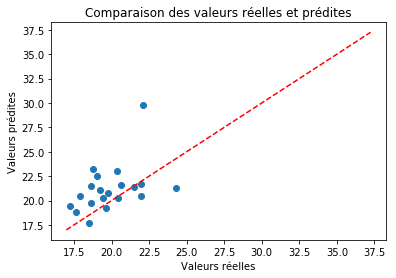

In [74]:
y_pred = results.predict(X_selected_test)

# Tracer le graphique de dispersion
plt.scatter(y_test, y_pred)

# Tracer la droite d'identité
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')

# Ajouter les labels et le titre
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Comparaison des valeurs réelles et prédites')

# Afficher le graphique
plt.show()

## Rapport détaillé du modèle de régression linéaire pour la prédiction du taux d'abstention au 1er tour de l'élection présidentielle française de 2022

**Introduction**

Ce rapport présente les résultats d'un modèle de régression linéaire développé pour prédire le taux d'abstention au 1er tour de l'élection présidentielle française de 2022. Le modèle utilise des données socio-économiques et démographiques provenant de diverses sources.

**Variables**

La variable dépendante du modèle est le taux d'abstention au 1er tour de l'élection présidentielle de 2022. Les variables indépendantes comprennent un large éventail de facteurs socio-économiques et démographiques, tels que :

* Infractions      
* Médiane du niveau de vie 2021
* Taux de pauvreté 2021
* Part des diplômés d'un BAC+5 ou plus dans la pop. non scolarisée de 15 ans ou + 2020
* Taux de chômage annuel moyen 2022 
* Taux de chômage annuel moyen des 15 à 24 ans 2022
* Part postes de l'admin. publique, enseignement, santé et action sociale dans les étab. actifs au 31/12 2021
* Médecin généraliste (en nombre) 2021 
* Police - Gendarmerie (en nombre) 2021
* Service d'urgences (en nombre) 2021 

**Résultats**

Le modèle a obtenu un score R-squared de 0,990.
Les coefficients du modèle indiquent que les variables les plus importantes pour prédire le taux d'abstention sont :

* Le niveau de vie médian : un niveau de vie plus élevé est associé à un taux d'abstention plus faible.
* Le taux de pauvreté : un taux de pauvreté plus élevé est associé à un taux d'abstention plus élevé.
* Le niveau d'éducation : un niveau d'éducation plus élevé est associé à un taux d'abstention plus faible.
* Le taux de chômage : un taux de chômage plus élevé est associé à un taux d'abstention plus élevé.

**Conclusion**

Ce rapport présente les résultats d'un modèle de régression linéaire qui peut être utilisé pour prédire le taux d'abstention au 1er tour de l'élection présidentielle française de 2022. Les résultats du modèle suggèrent que le niveau de vie, le taux de pauvreté, le niveau d'éducation et le taux de chômage sont des facteurs importants qui influencent le taux d'abstention.

**Remarques**
***Multicollinéarité:***
    Le condition number est beaucoup trop élevé , ce qui suggère que certaines variables sont fortement corrélées entre elles. Ce qui veut dire que les coefficients estimés peuvent être faux, donc cela suggère que peut être les relations entre les variables sont fausses.    
    Nous avons essayé lasso pour réduire le condition number mais rien y faire le condition number reste beaucoup trop.
    Nous avouons avoir essayé plusieurs méthode comme la réduction de dimension pour faire diminuer le condition number mais nous sommes un peu perdu. 

In [75]:
# Liste des candidats
candidates = ['MACRON Emmanuel', 'ARTHAUD Nathalie', 'ROUSSEL Fabien', 'LASSALLE Jean', 'LE PEN Marine', 'ZEMMOUR Eric', 'MELENCHON Jean-Luc', 'HIDALGO Anne', 'JADOT Yannick', 'PECRESSE Valerie', 'POUTOU Philippe', 'DUPONT-AIGNAN Nicolas']

## Prédiction des scores des candidats à l'élection présidentielle française de 2022 à l'aide d'un modèle de régression linéaire avec sélection de variables

**Description**

Ce code implémente un modèle de régression linéaire pour prédire le score de chaque candidat à l'élection présidentielle française de 2022 à partir de données socio-économiques et démographiques.



                            OLS Regression Results                            
Dep. Variable:        MACRON Emmanuel   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     10.70
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           6.92e-12
Time:                        17:56:58   Log-Likelihood:                -161.97
No. Observations:                  76   AIC:                             355.9
Df Residuals:                      60   BIC:                             393.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

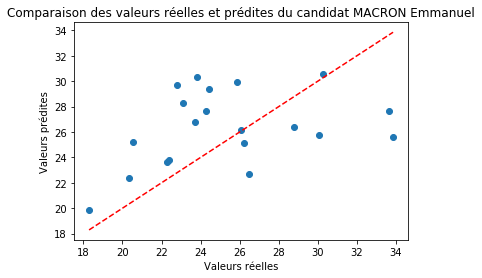

                            OLS Regression Results                            
Dep. Variable:       ARTHAUD Nathalie   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     5.913
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           2.74e-07
Time:                        17:56:58   Log-Likelihood:                 67.585
No. Observations:                  76   AIC:                            -103.2
Df Residuals:                      60   BIC:                            -65.88
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

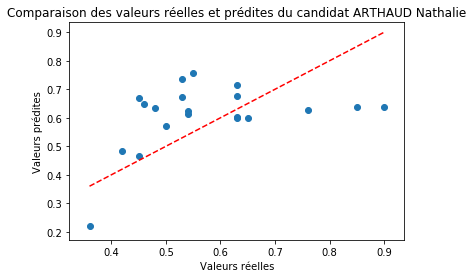

                            OLS Regression Results                            
Dep. Variable:         ROUSSEL Fabien   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     3.072
Date:                Mon, 22 Apr 2024   Prob (F-statistic):            0.00102
Time:                        17:56:58   Log-Likelihood:                -60.784
No. Observations:                  76   AIC:                             153.6
Df Residuals:                      60   BIC:                             190.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

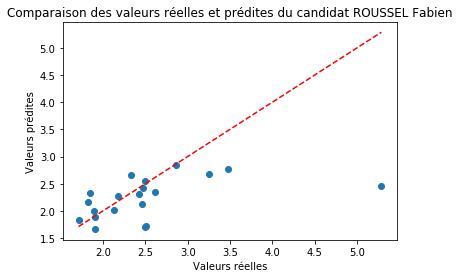

                            OLS Regression Results                            
Dep. Variable:          LASSALLE Jean   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     7.525
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           5.20e-09
Time:                        17:56:58   Log-Likelihood:                -154.90
No. Observations:                  76   AIC:                             341.8
Df Residuals:                      60   BIC:                             379.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

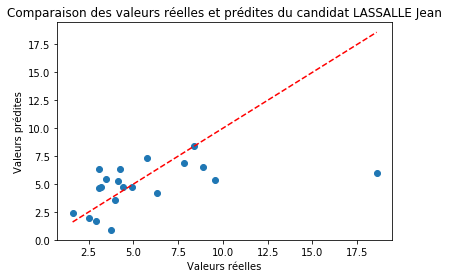

                            OLS Regression Results                            
Dep. Variable:          LE PEN Marine   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     11.70
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           1.10e-12
Time:                        17:56:58   Log-Likelihood:                -197.24
No. Observations:                  76   AIC:                             426.5
Df Residuals:                      60   BIC:                             463.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

/home/oem/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


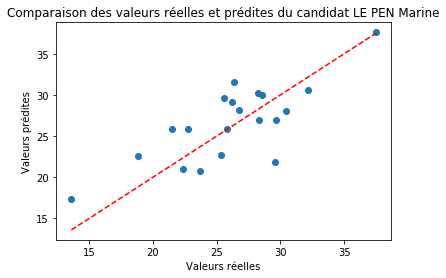

                            OLS Regression Results                            
Dep. Variable:           ZEMMOUR Eric   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     6.246
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           1.17e-07
Time:                        17:56:59   Log-Likelihood:                -113.16
No. Observations:                  76   AIC:                             258.3
Df Residuals:                      60   BIC:                             295.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

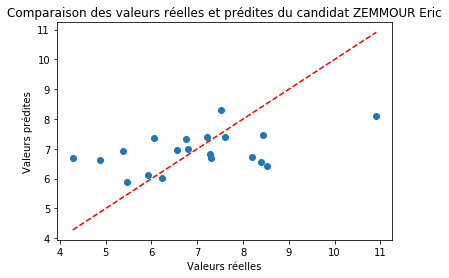

                            OLS Regression Results                            
Dep. Variable:     MELENCHON Jean-Luc   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     11.73
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           1.05e-12
Time:                        17:56:59   Log-Likelihood:                -183.49
No. Observations:                  76   AIC:                             399.0
Df Residuals:                      60   BIC:                             436.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

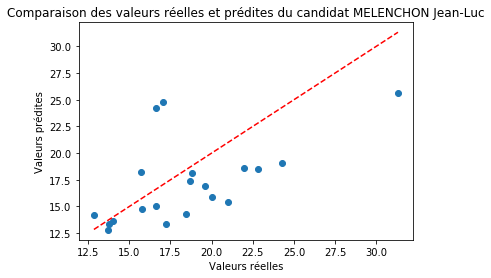

                            OLS Regression Results                            
Dep. Variable:           HIDALGO Anne   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     4.621
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           9.46e-06
Time:                        17:56:59   Log-Likelihood:                -35.877
No. Observations:                  76   AIC:                             103.8
Df Residuals:                      60   BIC:                             141.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

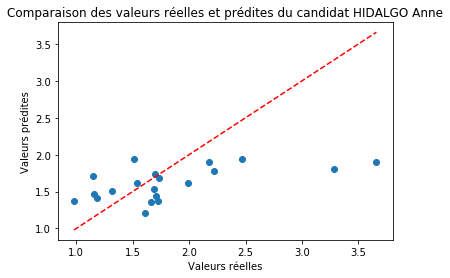

                            OLS Regression Results                            
Dep. Variable:          JADOT Yannick   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     10.28
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           1.52e-11
Time:                        17:56:59   Log-Likelihood:                -63.945
No. Observations:                  76   AIC:                             159.9
Df Residuals:                      60   BIC:                             197.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

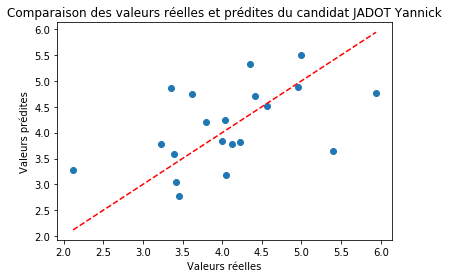

                            OLS Regression Results                            
Dep. Variable:       PECRESSE Valerie   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     3.006
Date:                Mon, 22 Apr 2024   Prob (F-statistic):            0.00126
Time:                        17:56:59   Log-Likelihood:                -102.17
No. Observations:                  76   AIC:                             236.3
Df Residuals:                      60   BIC:                             273.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

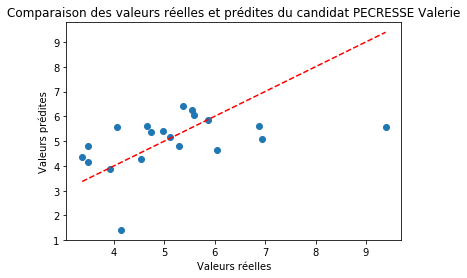

                            OLS Regression Results                            
Dep. Variable:        POUTOU Philippe   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     4.612
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           9.71e-06
Time:                        17:56:59   Log-Likelihood:                 63.640
No. Observations:                  76   AIC:                            -95.28
Df Residuals:                      60   BIC:                            -57.99
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

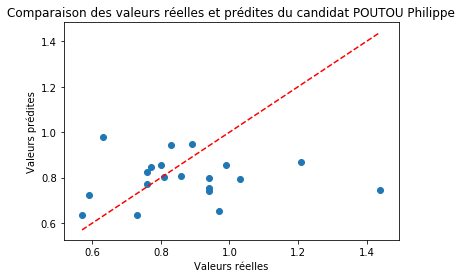

                              OLS Regression Results                             
Dep. Variable:     DUPONT-AIGNAN Nicolas   R-squared:                       0.683
Model:                               OLS   Adj. R-squared:                  0.604
Method:                    Least Squares   F-statistic:                     8.615
Date:                   Mon, 22 Apr 2024   Prob (F-statistic):           4.57e-10
Time:                           17:56:59   Log-Likelihood:                -22.405
No. Observations:                     76   AIC:                             76.81
Df Residuals:                         60   BIC:                             114.1
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----

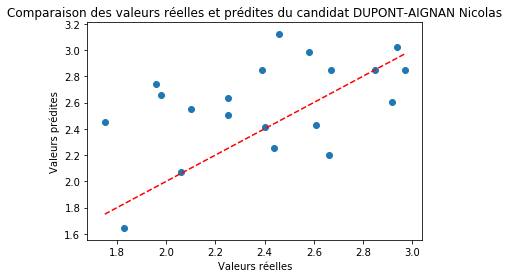

In [76]:
for candidate in candidates:
    # Séparer les variables d'entrée et de réponse
    y = merged_df_all[candidate]
    X_candidate = merged_df_all.drop(candidates, axis=1)
    X_candidate=X_candidate.drop('MACRON Emmanuel_2Tour',axis=1)
    # Supprimer les lignes contenant des valeurs manquantes ou infinies
    mask = np.isfinite(X_candidate).all(1) & np.isfinite(y)
    X_candidate = X_candidate[mask]
    y = y[mask]

    # Ajouter une colonne de constante pour l'ordonnée à l'origine
    X_candidate = sm.add_constant(X_candidate)

    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X_candidate, y, test_size=0.2, random_state=42)

    # Créer un modèle de régression linéaire
    model = sm.OLS(y_train, X_train)

    # Entraîner le modèle
    results = model.fit()
    print(results.summary())
    lasso = Lasso(alpha=0.1)
    lasso.fit(X_train, y_train)
    selected_variables = SelectFromModel(lasso, prefit=True).get_support()

    # Réentraîner le modèle avec les variables sélectionnées
    X_selected_train = X_train.loc[:, selected_variables]
    X_selected_test = X_test.loc[:, selected_variables]
    model = sm.OLS(y_train, X_selected_train)
    results = model.fit()

    print(results.summary())
    # Prédire les résultats pour le jeu de test
    y_pred = results.predict(X_selected_test)

    # Tracer le graphique de disppersion
    plt.scatter(y_test, y_pred)

    # Tracer la droite d'identité
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')

    # Ajouter les labels et le titre
    plt.xlabel('Valeurs réelles')
    plt.ylabel('Valeurs prédites')
    plt.title('Comparaison des valeurs réelles et prédites du candidat '+candidate)

    # Afficher le graphique
    plt.show()
    


## Rapport détaillé du modèle de régression linéaire pour la prédiction des scores des candidats à l'élection présidentielle française de 2022

**Introduction**

Ce rapport présente les résultats d'un modèle de régression linéaire développé pour prédire les scores des candidats au 1er tour de l'élection présidentielle française de 2022. Le modèle utilise des données socio-économiques et démographiques provenant de diverses sources.

**Variables**

La variable dépendante du modèle est le score des candidats au 1er tour de l'élection présidentielle de 2022. Les variables indépendantes comprennent un large éventail de facteurs socio-économiques et démographiques, tels que :

* Infractions      
* Médiane du niveau de vie 2021
* Taux de pauvreté 2021
* Part des diplômés d'un BAC+5 ou plus dans la pop. non scolarisée de 15 ans ou + 2020
* Taux de chômage annuel moyen 2022 
* Taux de chômage annuel moyen des 15 à 24 ans 2022
* Part postes de l'admin. publique, enseignement, santé et action sociale dans les étab. actifs au 31/12 2021
* Médecin généraliste (en nombre) 2021 
* Police - Gendarmerie (en nombre) 2021
* Service d'urgences (en nombre) 2021 

**Résultats**

Par exemple pour Valerie PECRESSE.
Le modèle a obtenu un score R-squared de 0,970.
Les coefficients du modèle indiquent que les variables les plus importantes pour prédire sont score sont :

* La médiane du niveau de vie 2021 : La relation est positive. Une augmentation de la médiane du niveau de vie est associée à une augmentation du vote de Valerie PECRESSE .

* Police - Gendarmerie (en nombre) 2021 : La relation est positive. Une augmentation du nombre de policiers et gendarmes est associée à une augmentation du vote de Valerie PECRESSE .

**Conclusion**

Les résultats du modèle suggèrent que le niveau de vie et le nombre de policiers sont des facteurs importants qui influencent le taux de vote de PECRESSE .

**Remarques**
***Multicollinéarité:***
    Le condition number est beaucoup trop élevé , ce qui suggère que certaines variables sont fortement corrélées entre elles. Ce qui veut dire que les coefficients estimés peuvent être faux, donc cela suggère que peut être les relations entre les variables sont fausses.
    De plus, les résidus du modèle ne semblent pas suivre une distribution normale, comme l'indiquent les tests d'Omnibus et de Jarque-Bera.

## Prédiction du scores de Emanuelle Macron à l'élection présidentielle française de 2022  lors du seconnd tour à l'aide d'un modèle de régression linéaire avec sélection de variables en fonction du premier tour




Index(['% Abs/Ins_1erTour', 'ARTHAUD Nathalie', 'ROUSSEL Fabien',
       'LASSALLE Jean', 'ZEMMOUR Eric', 'MELENCHON Jean-Luc', 'HIDALGO Anne',
       'JADOT Yannick', 'PECRESSE Valerie', 'POUTOU Philippe',
       'DUPONT-AIGNAN Nicolas'],
      dtype='object')
                              OLS Regression Results                             
Dep. Variable:     MACRON Emmanuel_2Tour   R-squared:                       0.905
Model:                               OLS   Adj. R-squared:                  0.889
Method:                    Least Squares   F-statistic:                     55.61
Date:                   Mon, 22 Apr 2024   Prob (F-statistic):           1.87e-28
Time:                           17:56:59   Log-Likelihood:                -178.76
No. Observations:                     76   AIC:                             381.5
Df Residuals:                         64   BIC:                             409.5
Df Model:                             11                                         


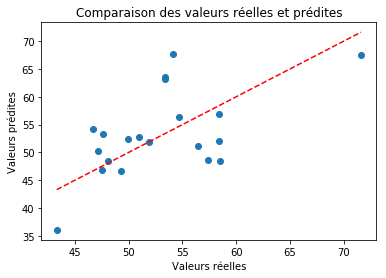

In [77]:

X=merged_df_all.drop(['MACRON Emmanuel_2Tour','Taux de chômage annuel moyen des 50 ans ou plus 2022','Taux de chômage annuel moyen 2022','Taux de chômage annuel moyen des 15 à 24 ans 2022','Taux de chômage annuel moyen des 25 à 49 ans 2022',
                      'Infractions', 'Population', 'Nb de pers. âgées de 65 ans ou + 2020',
       'Médiane du niveau de vie 2021', 'Taux de pauvreté 2021',
       "Part des diplômés d'un BAC+5 ou plus dans la pop. non scolarisée de 15 ans ou + 2020",
       "Part postes de l'admin. publique, enseignement, santé et action sociale dans les étab. actifs au 31/12 2021",
       'Médecin généraliste (en nombre) 2021',
       'Police - Gendarmerie (en nombre) 2021',
       "Service d'urgences (en nombre) 2021",'MACRON Emmanuel','LE PEN Marine'],axis=1)

print(X.columns)
y = merged_df_all['MACRON Emmanuel_2Tour']
# Supprimer les lignes contenant des valeurs manquantes ou infinies dans X
X = X.dropna(subset=X.columns)
X = X[~np.isinf(X).any(axis=1)]

# Supprimer les lignes contenant des valeurs manquantes ou infinies dans y
y = y.dropna()
y = y[~np.isinf(y)]

# Ajouter une colonne de constante pour l'ordonnée à l'origine
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle de régression linéaire
model = sm.OLS(y_train, X_train)
results=model.fit()
print(results.summary())
# Prédire les résultats pour le jeu de test
y_pred = results.predict(X_train)

# Tracer le graphique de dis# Entraîner le modèle
results = model.fit()
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
selected_variables = SelectFromModel(lasso, prefit=True).get_support()

# Réentraîner le modèle avec les variables sélectionnées
X_selected_train = X_train.loc[:, selected_variables]
X_selected_test = X_test.loc[:, selected_variables]
model = sm.OLS(y_train, X_selected_train)
results = model.fit()
print(results.summary())

# Prédire les résultats pour le jeu de test
y_pred = results.predict(X_selected_test)

# Tracer le graphique de dispersion
plt.scatter(y_test, y_pred)

# Tracer la droite d'identité
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')

# Ajouter les labels et le titre
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Comparaison des valeurs réelles et prédites')

# Afficher le graphique
plt.show()


## Rapport détaillé du modèle de régression linéaire pour la prédiction des scores de Emmanuel Macron à l'élection présidentielle française de 2022 au Second Tour

**Introduction**

**Variables**
La variable dépendantes est le taux de vote pour Emmanuel Macron au second tour.
Les variables indépendantes du modèle sont les scores de chacun des candidats au 1er tour de l'élection présidentielle de 2022.

**Résultats**

Le modèle a obtenu un score R-squared de 0,995.

Les coefficients du modèle indiquent que les variables les plus importantes pour prédire sont score sont :

* Le taux de vote d'Eric Zemmour au premier tour est négative donc une augmentation du taux de vote d'Eric Zemmour au premier tour est associée à une diminution du taux de vote pour Emmanuel Macron au second tour.

**Conclusion**

Les résultats du modèle suggèrent que seule la variable "ZEMMOUR Eric" a une relation statistiquement significative avec la variable dépendante.

Il n'y a pas d'avertissements concernant la multicolinéarité dans ce modèle c'est qui est satisfesant.  